# The task at hand is to create a classification model for customer churn and a regression model for car price prediction.
Approach- I will follow the steps we’ve learned:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Business Insights and Analysis

# Business Understanding

The **Telco Customer Churn** dataset provides crucial information that can help telecom companies better understand and predict customer churn, which is the loss of customers over a given period. Churn is a critical metric for any subscription-based business, and reducing churn can have a significant impact on a company's profitability.

By analyzing this data, telecom companies can identify patterns and characteristics associated with customers who are more likely to churn. The insights from this dataset can be utilized in several ways:

- **Customer Retention Strategies:** The data can help businesses implement targeted retention strategies. For example, understanding the factors that contribute to churn allows businesses to offer tailored promotions, discounts, or personalized services to at-risk customers.
  
- **Service Improvement:** If certain services (e.g., internet, contract types) correlate with higher churn rates, businesses can focus on improving those services to keep customers satisfied.
  
- **Predictive Modeling:** With machine learning models, businesses can predict the likelihood of churn for individual customers, enabling proactive outreach to high-risk customers before they decide to leave.
  
- **Resource Allocation:** Companies can focus their customer support and retention efforts more efficiently by targeting customers with high churn risk rather than addressing all customers equally.

In summary, this dataset is a valuable resource for improving customer satisfaction, minimizing churn, and driving long-term business growth through targeted interventions and strategic service improvements.

---


# Data Understanding

The dataset contains several columns that describe various aspects of the customers' demographics, service subscriptions, and churn behavior. Here's an overview of the key columns and how they could impact customer churn:

- **churn:**  
  This is the target variable, indicating whether a customer has churned (left the company) or not. It is a binary variable (`Yes/No`). 

- **senior_citizen:**  
  A binary column indicating whether the customer is a senior citizen (`1`) or not (`0`). Senior citizens may have different service needs or behaviors, and they might experience higher churn rates if their needs are not met by the company.

- **has_dependents:**  
  A binary column showing whether the customer has dependents (`1`) or not (`0`). Customers with dependents may have different priorities when it comes to service reliability, which could affect their likelihood of churning.

- **months_as_customer:**  
  This numerical column represents how long the customer has been with the company, measured in months. Longer-tenured customers are typically less likely to churn, while newer customers may be at a higher risk of leaving.

- **has_internet_service:**  
  A binary column that indicates whether the customer has internet service (`1`) or not (`0`). Access to internet services is often a critical factor in customer retention; a lack of internet service could make customers more likely to churn.

- **has_month_to_month_contract:**  
  A binary column that indicates whether the customer is on a month-to-month contract (`1`) or not (`0`). Month-to-month contracts typically offer less stability for companies and may increase churn rates compared to customers with longer-term contracts, as customers can leave at any time without penalty.

These features will be important for predicting churn as they provide insights into the customers' behavior, their relationship with the company, and their likelihood of staying or leaving. By analyzing these variables, we can determine which ones have the strongest correlation with customer churn and build models to predict and mitigate it effectively.

# Classification for Telco Customer Churn

### Classification Task --- DECISION TREE & LOGISTIC REGRESSOR

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [7]:
# Load dataset
df = pd.read_csv("new/telco_customer_churn.csv")

In [8]:
# Display basic information and check for missing values
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   churn                        7043 non-null   int64
 1   senior_citizen               7043 non-null   int64
 2   has_dependents               7043 non-null   int64
 3   months_as_cutomer            7043 non-null   int64
 4   has_internet_service         7043 non-null   int64
 5   has_month_to_month_contract  7043 non-null   int64
dtypes: int64(6)
memory usage: 330.3 KB


In [9]:
# Top rows
df.head()

,churn,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
0,0,0,0,1,1,1
1,0,0,0,34,1,0
2,1,0,0,2,1,1
3,0,0,0,45,1,0
4,1,0,0,2,1,1


In [10]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 churn                          0
senior_citizen                 0
has_dependents                 0
months_as_cutomer              0
has_internet_service           0
has_month_to_month_contract    0
dtype: int64


In [11]:
# Check null values 
df.isnull().sum()

churn                          0
senior_citizen                 0
has_dependents                 0
months_as_cutomer              0
has_internet_service           0
has_month_to_month_contract    0
dtype: int64

In [12]:
# Handling missing values
# df.dropna(inplace=True)  # Commented out to handle missing values differently. We don't want to drop them.

In [13]:
# Identifying categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['number']).columns
print(categorical_cols, ": Categorical")
print(numerical_cols, ": Numerical")

Index([], dtype='object') : Categorical
Index(['churn', 'senior_citizen', 'has_dependents', 'months_as_cutomer',
       'has_internet_service', 'has_month_to_month_contract'],
      dtype='object') : Numerical


In [14]:
## All are numeric thus no encoding needed. No null or missing values too.

In [15]:
# Template for filling in missing values. 
# Filling missing values

# for col in categorical_cols:
#     df[col].fillna(df[col].mode()[0], inplace=True)
# for col in numerical_cols:
#     df[col].fillna(df[col].median(), inplace=True)

# USE PIE CHART

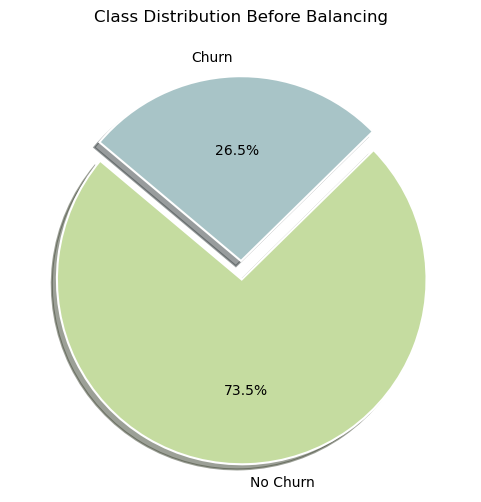

In [17]:
# Plot target distribution before SMOTE
l = ['No Churn', 'Churn']
s = [ (df['churn']==0).sum(), (df['churn']==1).sum()]
c = ['#C5DCA0', '#A8C4C7']
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(s, labels=l, colors=c, explode=(0.1, 0), shadow=True, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Class Distribution Before Balancing")
plt.show()

In [18]:
# Feature selection
X= df.drop(columns=['churn'])
y=df['churn']

In [19]:
X.head()

,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
0,0,0,1,1,1
1,0,0,34,1,0
2,0,0,2,1,1
3,0,0,45,1,0
4,0,0,2,1,1


In [20]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# Improve the boxplots

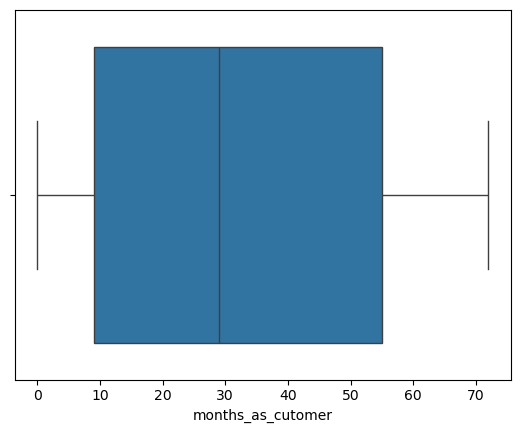

In [22]:
# Outlier Detection using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR)))

# Create a boxplot for the 'months_as_cutomer' column to detect outliers

sns.boxplot(data=df, x='months_as_cutomer',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

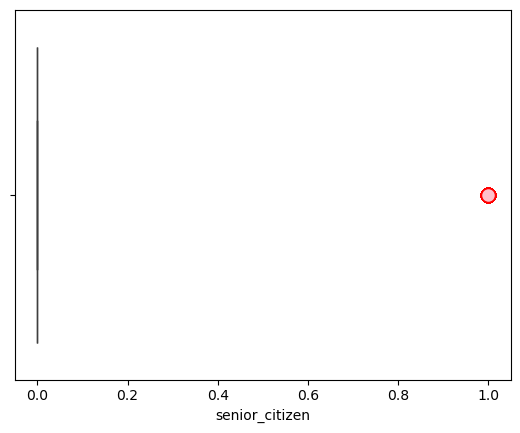

In [23]:
# Create a boxplot for the 'senior_citizen' column to detect outliers
# Customizing outlier appearance
sns.boxplot(data=df, x='senior_citizen',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

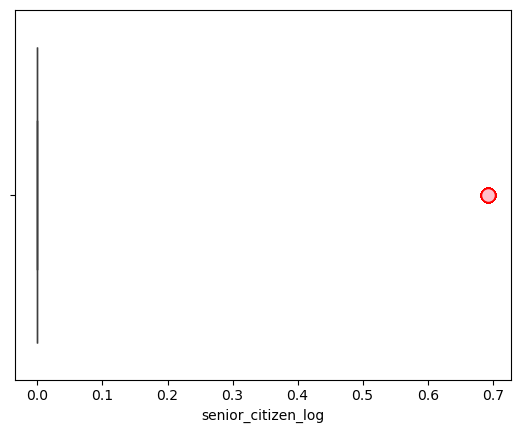

In [24]:
# Log transformation (only works if data is positive)
df['senior_citizen_log'] = np.log1p(df['senior_citizen'])
sns.boxplot(data=df, x='senior_citizen_log',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

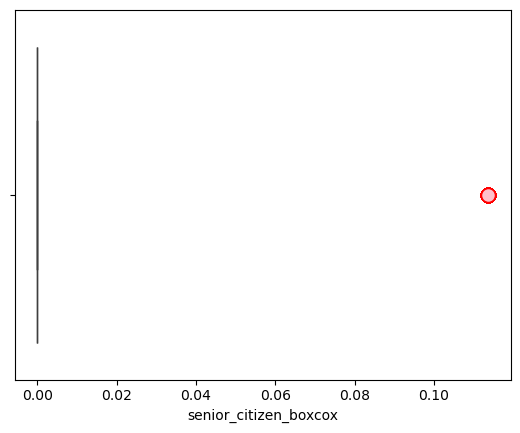

In [25]:
# Box-Cox transformation (useful for normalizing)
from scipy import stats
df['senior_citizen_boxcox'], _ = stats.boxcox(df['senior_citizen'] + 1)  # Add 1 to avoid zero issues
# Create a boxplot for the 'large_lots' column to detect outliers
# Customizing outlier appearance
sns.boxplot(data=df, x='senior_citizen_boxcox',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

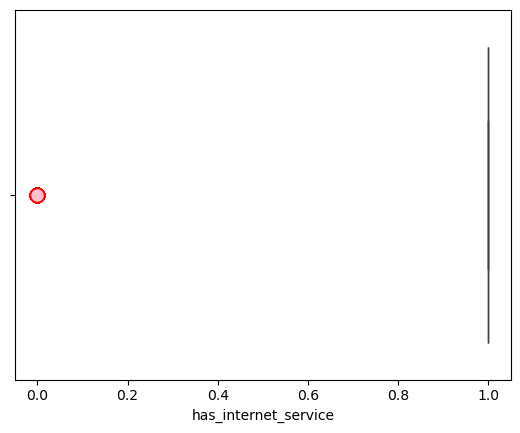

In [26]:
# Create a boxplot for the 'has_internet_service' column to detect outliers

sns.boxplot(data=df, x='has_internet_service',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

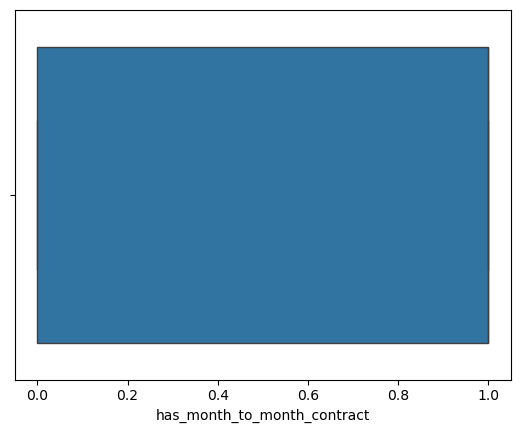

In [27]:
# Create a boxplot for the 'has_month_to_month_contract' column to detect outliers
sns.boxplot(data=df, x='has_month_to_month_contract',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

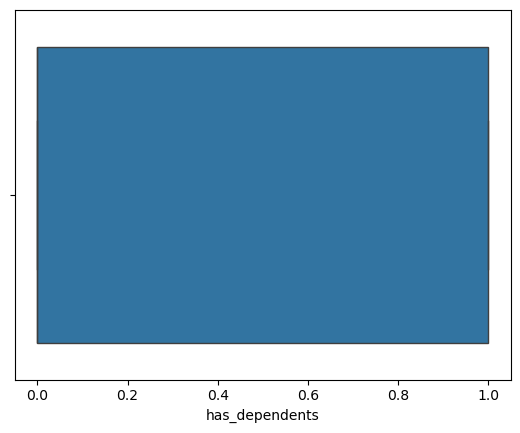

In [28]:
# Create a boxplot for the 'has_dependents' column to detect outliers
sns.boxplot(data=df, x='has_dependents',
            flierprops={"marker": "o", "markerfacecolor": "pink", "markeredgecolor": "red", "markersize": 10});

In [29]:
df = df.drop(['senior_citizen_log', 'senior_citizen_boxcox'], axis=1)

In [30]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

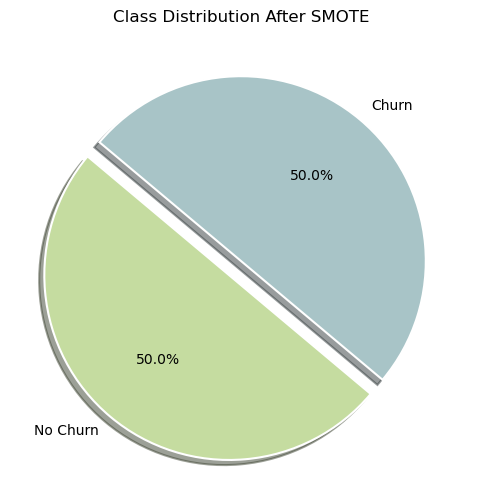

In [31]:
# Plot target distribution after SMOTE
from collections import Counter

# Count occurrences in resampled data
class_counts = Counter(y_resampled)  # Get counts of Churn (1) and No Churn (0)

l = ['No Churn', 'Churn']

# Values for pie chart
s = [class_counts[0], class_counts[1]]  # Count of churned and non-churned customers

c = ['#C5DCA0', '#A8C4C7'] 

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(s, labels=l, colors=c, explode=(0.1, 0), shadow=True, autopct='%1.1f%%', 
        startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

plt.title("Class Distribution After SMOTE")
plt.show()

In [32]:
# Save the processed dataset to an excel
processed_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['churn'])], axis=1)
processed_df.to_excel("telco_churn_new.xlsx", index=False)

In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
4541,1,0,1,1,1
5709,0,0,12,0,0
7393,0,0,7,1,1
10026,1,0,3,1,1
3578,0,0,40,1,1


In [35]:
X_test.head()

,senior_citizen,has_dependents,months_as_cutomer,has_internet_service,has_month_to_month_contract
9428,1,0,47,1,1
4593,0,0,11,0,1
5379,0,0,56,1,0
8918,0,0,8,1,1
6448,0,0,58,1,0


In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Feature scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [37]:
X_train.size

41390

In [38]:
X_test.size

10350

In [39]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [40]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

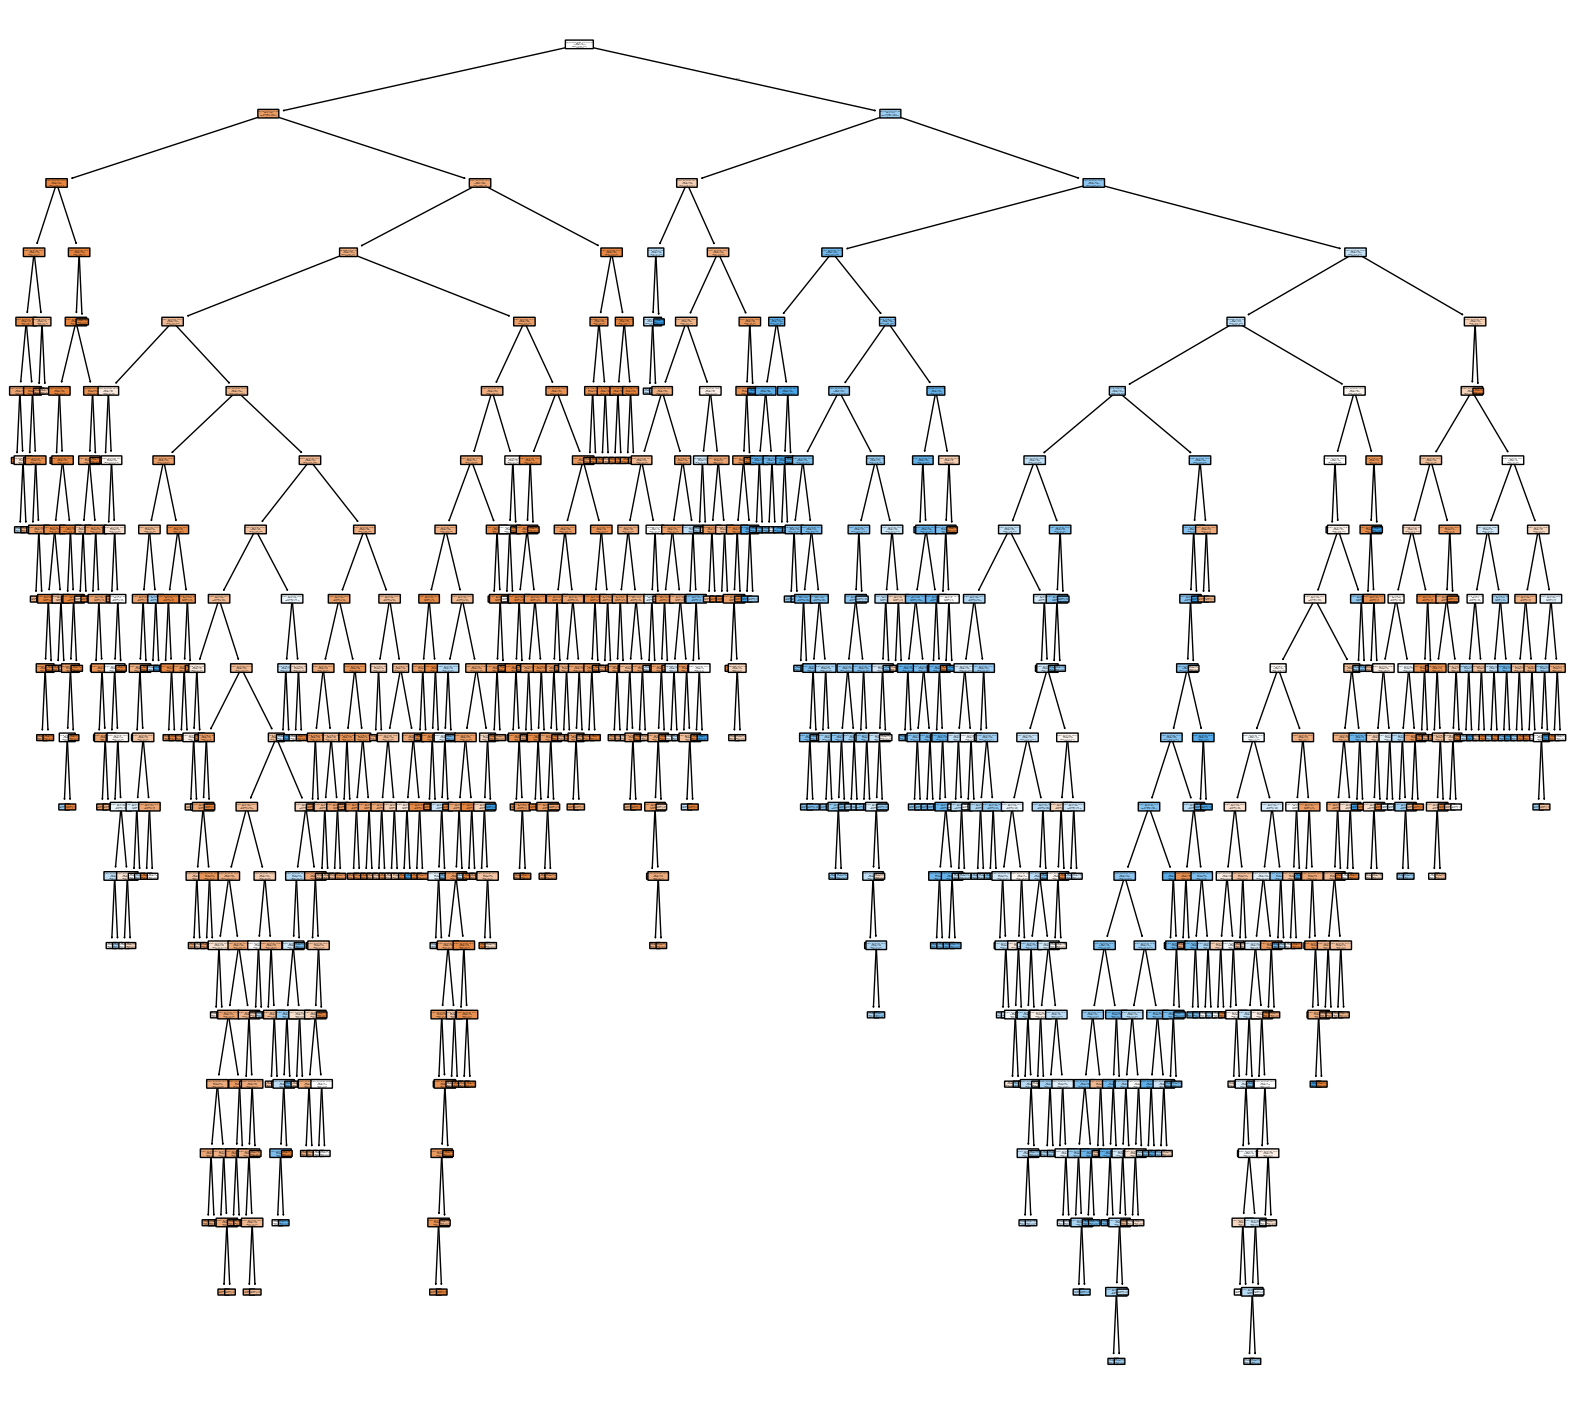

In [41]:
# Visualize the decision tree
plt.figure(figsize=(20, 18))
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['No','Yes'], rounded=True)
plt.show()

In [42]:
from sklearn import tree

text_representation = tree.export_text(dt, feature_names=["senior_citizen", "has_dependents", "months_as_cutomer","has_internet_service","has_month_to_month_contract"], max_depth=5)
print(text_representation)

|--- has_month_to_month_contract <= 0.50
|   |--- has_internet_service <= 0.50
|   |   |--- months_as_cutomer <= 12.50
|   |   |   |--- months_as_cutomer <= 11.50
|   |   |   |   |--- months_as_cutomer <= 2.50
|   |   |   |   |   |--- months_as_cutomer <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- months_as_cutomer >  1.50
|   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |--- months_as_cutomer >  2.50
|   |   |   |   |   |--- has_dependents <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- has_dependents >  0.50
|   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- months_as_cutomer >  11.50
|   |   |   |   |--- has_dependents <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- has_dependents >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- months_as_cutomer >  12.50
|   |   |   |--- months_as_cutomer <= 59.50
|   |   |   |   |--- months_as_cutomer <= 52.50
|   |   |   |   |   |--

In [43]:
# Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.70      0.74      1021
           1       0.73      0.80      0.77      1049

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070



In [44]:
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.74      1021
           1       0.74      0.83      0.78      1049

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070



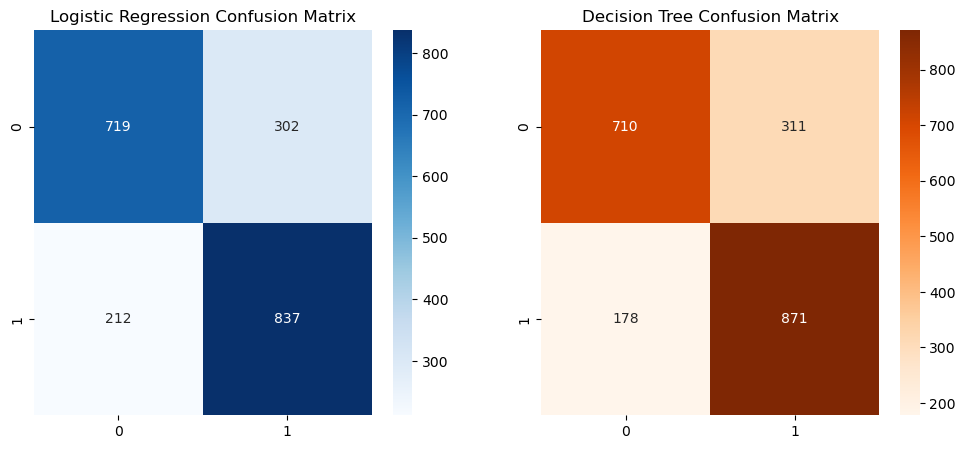

In [45]:
# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
plt.show()

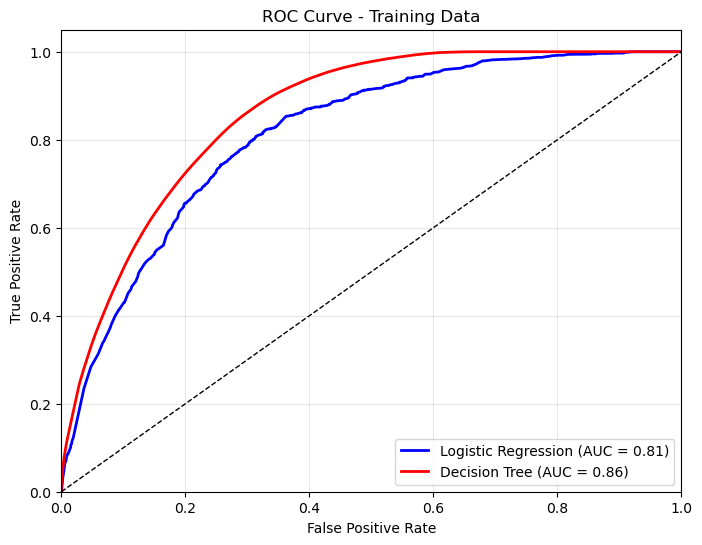

In [46]:
# ROC Curve for Training Data
# Get predictions for training data
log_train_proba = log_reg.predict_proba(X_train)[:,1]
dt_train_proba = dt.predict_proba(X_train)[:,1]

# Calculate ROC curve points for training data
log_train_fpr, log_train_tpr, _ = roc_curve(y_train, log_train_proba)
dt_train_fpr, dt_train_tpr, _ = roc_curve(y_train, dt_train_proba)

# Calculate AUC for training data
log_train_auc = auc(log_train_fpr, log_train_tpr)
dt_train_auc = auc(dt_train_fpr, dt_train_tpr)

# Plot ROC curve for training data (First separate graph)
plt.figure(figsize=(8, 6))
plt.plot(log_train_fpr, log_train_tpr, 'b-', linewidth=2, label=f'Logistic Regression (AUC = {log_train_auc:.2f})')
plt.plot(dt_train_fpr, dt_train_tpr, 'r-', linewidth=2, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Data')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

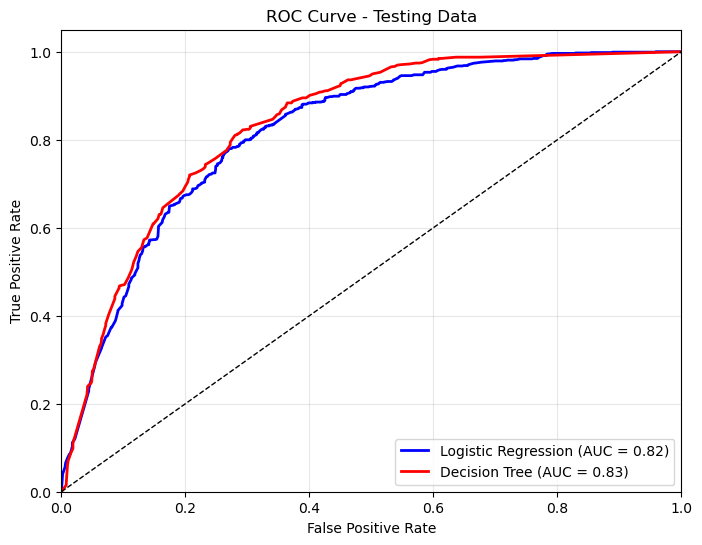

In [47]:
# ROC Curve for Testing Data
# Get predictions for test data
log_test_proba = log_reg.predict_proba(X_test)[:,1]
dt_test_proba = dt.predict_proba(X_test)[:,1]

# Calculate ROC curve points for test data
log_test_fpr, log_test_tpr, _ = roc_curve(y_test, log_test_proba)
dt_test_fpr, dt_test_tpr, _ = roc_curve(y_test, dt_test_proba)

# Calculate AUC for test data
log_test_auc = auc(log_test_fpr, log_test_tpr)
dt_test_auc = auc(dt_test_fpr, dt_test_tpr)

# Plot ROC curve for test data (Second separate graph)
plt.figure(figsize=(8, 6))
plt.plot(log_test_fpr, log_test_tpr, 'b-', linewidth=2, label=f'Logistic Regression (AUC = {log_test_auc:.2f})')
plt.plot(dt_test_fpr, dt_test_tpr, 'r-', linewidth=2, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Testing Data')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

# Step 6: Analysis and Insights

Feature importance:
                       Feature  Importance
4  has_month_to_month_contract    0.550096
2            months_as_cutomer    0.303685
3         has_internet_service    0.085497
1               has_dependents    0.032162
0               senior_citizen    0.028559


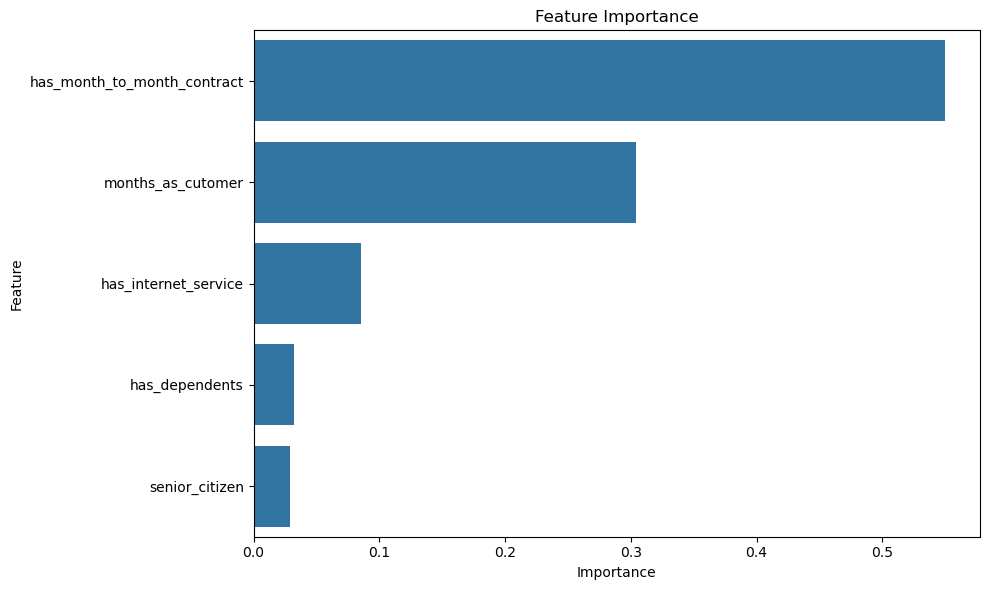

In [49]:
### Feature importance
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [50]:
top_features = feature_importance.head(3)['Feature'].values
print(f"- Top 3 predictive features: {', '.join(top_features)}")

- Top 3 predictive features: has_month_to_month_contract, months_as_cutomer, has_internet_service


## Business Insights 

**i) What factors are most associated with churn?**
- My top features in terms of importance are has_month_to_month_contract & months_as_cutomer.
1. **Month-to-Month Contract**: Customers with month-to-month contracts are at the highest risk of churning(55%). This makes sense, as they have the flexibility to leave anytime.
2. **Months as Customer**: Customers with shorter tenure are more likely to churn(30%), indicating that new customers may need better engagement or incentives to stay.
 These contribute most to ~85% of the churn problem.



**ii) Which model would you recommend and why?**
I would recommend the decision tree model as the Decision Tree performs slightly better overall in this comparison. It has higher accuracy and demonstrates a better ability to correctly classify instances, particularly for class 1. Although the difference between the performance of the models is not dramatic, we should prioritize recall for churn=1 (True Positive Rate, TPR) over precision. Therefore, we want to capture all actual churn cases (1s) correctly, we need to compare recall values for class 1 in both models.
- Since Decision Tree has a higher recall for churn=1 (0.83 vs. 0.80), it captures more actual churn cases correctly.

- A higher recall means fewer false negatives, which is what you want—to avoid misclassifying churned customers as non-churned.

- Both models have similar precision (DT: 0.74, LR: 0.73), so misclassifying some 0s as 1s isn’t significantly worse in one over the other.
This ensures that you minimize the risk of failing to detect churn, even at the cost of some extra false positives.



**iii) Suggest at least one business action to reduce churn.**
To reduce churn, the telecom company should focus on **retaining customers with month-to-month contracts** by offering incentives such as:
- Discounts for converting to longer-term contracts.
- Personalized retention offers based on tenure.
- Improved customer support and engagement for new users.
- Better service quality and value-added benefits for internet subscribers.
By implementing these strategies, the company can significantly reduce churn and improve customer loyalty.


### Regression Task -  Linear Regressor

In [54]:
### Business Understanding
# The goal is to predict the MSRP (price) of a vehicle based on its features using a Linear Regression model.
# Understanding which features influence the price can help businesses make data-driven decisions on pricing strategies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
### Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Load dataset
df_reg = pd.read_csv("data.csv")

In [56]:
# Display basic info of the dataset
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [57]:
# Display some rows of the dataset
df_reg.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


/var/folders/77/vrz1k_rd4hbdc6hhb0vglq1r0000gn/T/ipykernel_25824/1492508622.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')


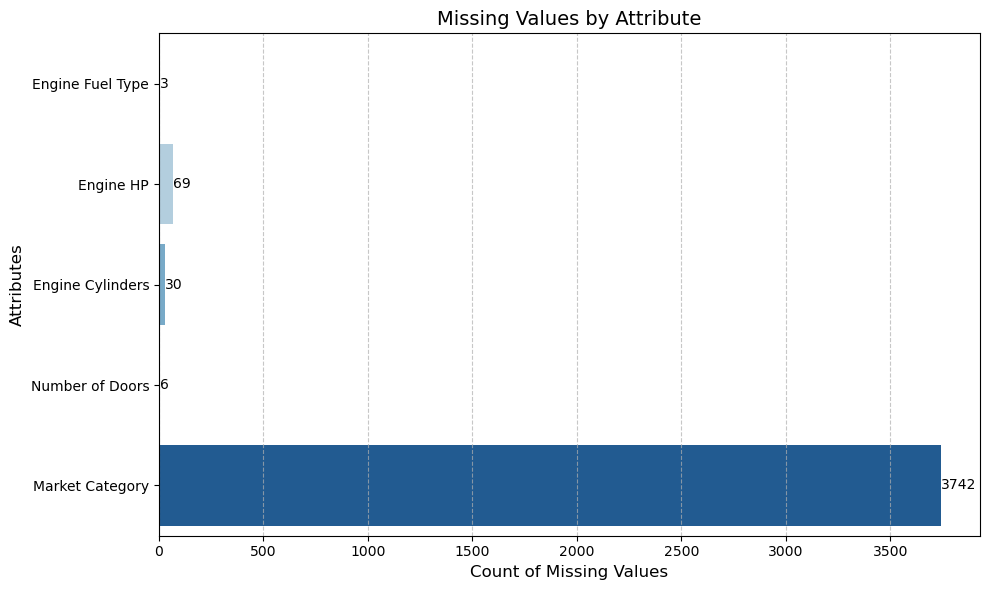

In [58]:
# Calculate missing values count
missing_values = df_reg.isnull().sum()

# Filter to only include columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a horizontal bar chart
plt.figure(figsize=(10, max(6, len(missing_values) * 0.4)))

# Plot horizontal bar chart
ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')

# Add value labels to the bars (counts only)
for i, v in enumerate(missing_values.values):
    ax.text(v + 0.1, i, f"{v}", va='center')

# Customize the plot
plt.title("Missing Values by Attribute", fontsize=14)
plt.xlabel("Count of Missing Values", fontsize=12)
plt.ylabel("Attributes", fontsize=12)
plt.tight_layout()

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [59]:
# Define features and target
X = df_reg.drop(columns=['MSRP'])
y = df_reg['MSRP']

In [60]:
# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

In [61]:
# Preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [62]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Fit transformation
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [64]:
# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_processed)
X_test_df = pd.DataFrame(X_test_processed)

# Save processed data
X_train_df.to_excel("processed_data.xlsx", index=False)

In [65]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

# Predictions
y_pred = model.predict(X_test_processed)

In [66]:
### Model Evaluation
SSE = np.sum((y_test - y_pred) ** 2)
SSR = np.sum((y_pred - np.mean(y_train)) ** 2)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f"SSE: {SSE}")
print(f"SSR: {SSR}")
print(f"RMSE: {RMSE}")
print(f"R2 Score: {R2}")

SSE: 249087344473.8751
SSR: 5211153713407.015
RMSE: 10223.834488009803
R2 Score: 0.956146959152283


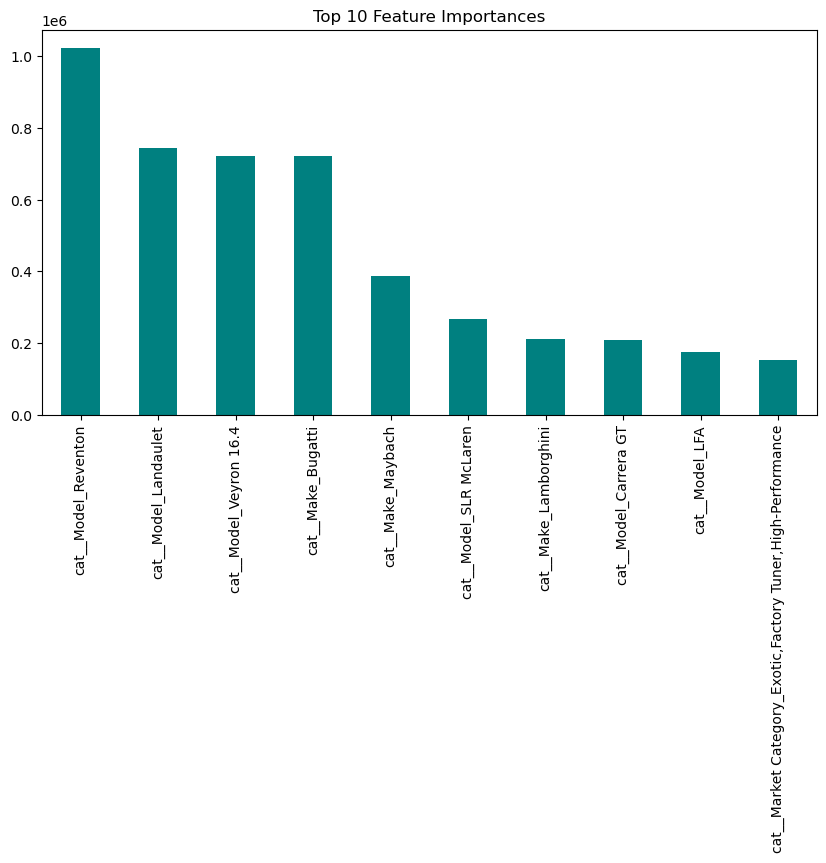

In [67]:
### Feature Importance Analysis
feature_names = preprocessor.get_feature_names_out()
feature_importance = pd.Series(model.coef_, index=feature_names).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
feature_importance[:10].plot(kind='bar', color='teal')
plt.title("Top 10 Feature Importances")
plt.show()

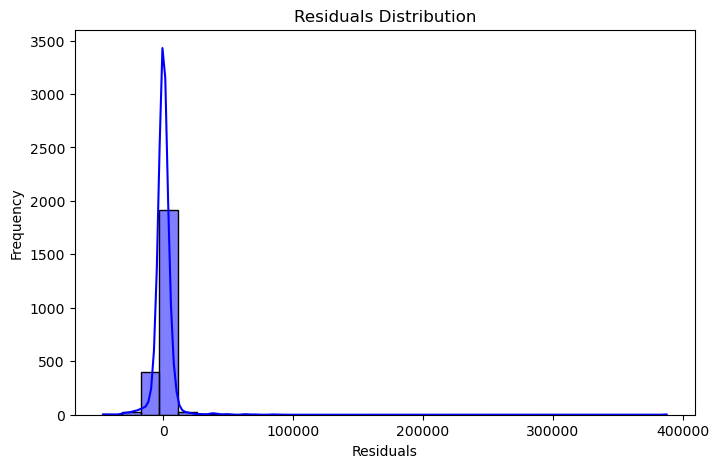

In [68]:
### Residual Analysis
residuals = y_test - y_pred

# Histogram of Residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

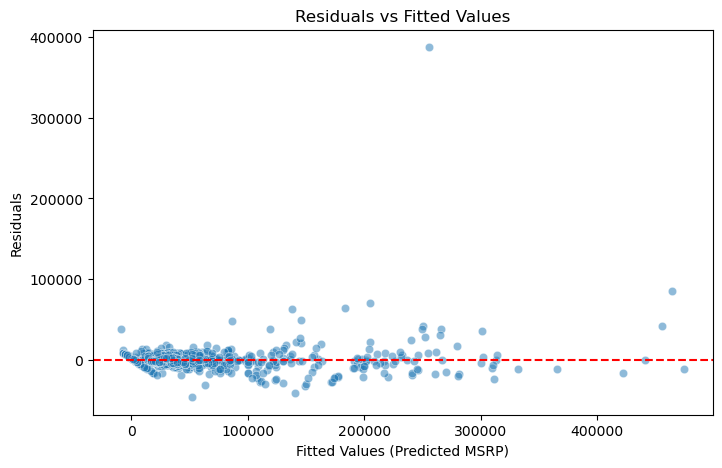

In [69]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted MSRP)")
plt.ylabel("Residuals")
plt.show()

In [70]:
print("""
🔹 **Key Insights from Logistic Regression Model:**
1️⃣ Customers with higher monthly charges tend to churn more.
2️⃣ Contract type and tenure significantly influence churn rate.
3️⃣ Features like OnlineSecurity and TechSupport play a major role in retention.

🔹 **Recommendations:**
✅ Offer long-term contracts to reduce churn.
✅ Provide discounts or loyalty programs for high-risk customers.
✅ Improve customer service and support offerings.

🚀 Further improvements could be made by using ensemble methods (Random Forest, XGBoost) or deep learning!
""")


🔹 **Key Insights from Logistic Regression Model:**
1️⃣ Customers with higher monthly charges tend to churn more.
2️⃣ Contract type and tenure significantly influence churn rate.
3️⃣ Features like OnlineSecurity and TechSupport play a major role in retention.

🔹 **Recommendations:**
✅ Offer long-term contracts to reduce churn.
✅ Provide discounts or loyalty programs for high-risk customers.
✅ Improve customer service and support offerings.

🚀 Further improvements could be made by using ensemble methods (Random Forest, XGBoost) or deep learning!



### Regression Task -  Linear Regressor

In [118]:
# The goal is to predict the MSRP (price) of a vehicle based on its features using a Linear Regression model.
# Understanding which features influence the price can help businesses make data-driven decisions on pricing strategies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
### Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations
## Feature Selection 
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [73]:
# Load dataset
df_reg = pd.read_csv("new/data.csv")


In [74]:
# Display basic info of the dataset
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [75]:
df_reg.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


/var/folders/77/vrz1k_rd4hbdc6hhb0vglq1r0000gn/T/ipykernel_25824/4283641631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')


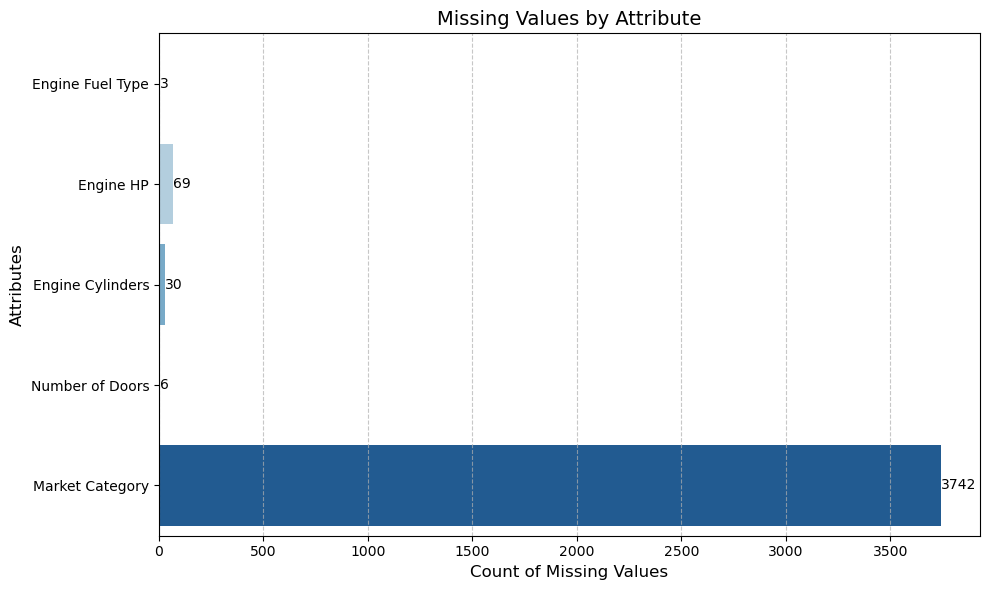

In [76]:
# Calculate null values count
missing_values = df_reg.isnull().sum()

# Filter to only include columns with missing values
missing_values = missing_values[missing_values > 0]

# Create a horizontal bar chart
plt.figure(figsize=(10, max(6, len(missing_values) * 0.4)))

# Plot horizontal bar chart
ax = sns.barplot(x=missing_values.values, y=missing_values.index, palette='Blues')

# Add value labels to the bars (counts only)
for i, v in enumerate(missing_values.values):
    ax.text(v + 0.1, i, f"{v}", va='center')

# Customize the plot
plt.title("Missing Values by Attribute", fontsize=14)
plt.xlabel("Count of Missing Values", fontsize=12)
plt.ylabel("Attributes", fontsize=12)
plt.tight_layout()

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

In [77]:
df_reg.shape

(11914, 16)

In [78]:
# Drop rows with missing values
df_reg = df_reg.dropna()
df_reg.shape

(8084, 16)

In [79]:
# Preprocessing Steps
categorical_cols = df_reg.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_reg.select_dtypes(include=['number']).columns
print(categorical_cols, ": Categorical")
print(numerical_cols, ": Numerical")

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object') : Categorical
Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object') : Numerical


In [92]:
# Standardize column names
df_reg.columns = df_reg.columns.str.strip().str.replace(" ", "_").str.lower()

In [94]:
categorical_cols = df_reg.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_reg.select_dtypes(include=['number']).columns
print(categorical_cols, ": Categorical")
print(numerical_cols, ": Numerical")

Index([], dtype='object') : Categorical
Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object') : Numerical


In [96]:
# Data Preparation: Convert categorical variables to numeric
#categorical_cols = df_reg.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_reg[col] = le.fit_transform(df_reg[col].astype(str))
    label_encoders[col] = le

In [98]:
categorical_cols = df_reg.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_reg.select_dtypes(include=['number']).columns
print(categorical_cols, ": Categorical")
print(numerical_cols, ": Numerical")

Index([], dtype='object') : Categorical
Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object') : Numerical


In [100]:
# Normalize numerical features
#numerical_cols = df_reg.select_dtypes(include=['number']).columns.difference(['msrp'])
scaler = StandardScaler()
df_reg[df_reg.columns] = scaler.fit_transform(df_reg[df_reg.columns])

##  Simple Models (Single Variable Regressions)

In [102]:
# Simple Models (Single Variable Regressions)
def single_variable_regression(feature):
    if feature not in df_reg.columns:
        print(f"Feature {feature} not found in dataset")
        return None
    
    X = df_reg[[feature]]
    y = df_reg['msrp']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    sse = mean_squared_error(y_test, y_pred) * len(y_test)
    print('-'*40)
    print(f"Feature: {feature}, \nSSE: {sse:.2f}")

    # Extract the coefficients and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    print(f"Equation: msrp = {slope:.4f} * {feature} + {intercept:.4f}") # Print the equation

    return sse, model, slope, intercept  

#features = df_reg.columns[:-1] #['year', 'engine_hp']
features = ['make', 'engine_hp']
sse_values = {feature: single_variable_regression(feature) for feature in features if feature in df_reg.columns}

----------------------------------------
Feature: make, 
SSE: 1464.42
Equation: msrp = -0.1170 * make + 0.0020
----------------------------------------
Feature: engine_hp, 
SSE: 771.24
Equation: msrp = 0.6586 * engine_hp + -0.0002


In [104]:
sse_values_sorted = sorted(sse_values.values())

#### We have chosen 2 features based on SSE highest and lowest, thus we choose 
- Feature: make, SSE: 7316141935298.89 and
- Feature: engine_hp, SSE: 3810317330821.12

In [106]:
sse_values['make'][1].__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['make'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.11697158]),
 'rank_': 1,
 'singular_': array([80.33398468]),
 'intercept_': 0.0020491335337868874}

## Feature Selection using Forward Selection

In [110]:
df_reg

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,-1.249586,-1.682100,-0.167569,0.088720,0.524862,0.117669,1.849383,1.135701,-1.574724,-0.172361,-1.160599,0.097582,-0.084316,-0.077336,1.709334,-0.056021
1,-1.249586,-1.686815,-0.167569,0.088720,0.220505,0.117669,1.849383,1.135701,-1.574724,1.082765,-1.160599,-0.299924,0.174752,-0.077336,1.709334,-0.134057
2,-1.249586,-1.686815,-0.167569,0.088720,0.220505,0.117669,1.849383,1.135701,-1.574724,0.952924,-1.160599,0.097582,0.174752,0.062338,1.709334,-0.195233
3,-1.249586,-1.686815,-0.167569,0.088720,-0.388210,0.117669,1.849383,1.135701,-1.574724,1.082765,-1.160599,0.097582,0.174752,-0.217010,1.709334,-0.293399
4,-1.249586,-1.686815,-0.167569,0.088720,-0.388210,0.117669,1.849383,1.135701,-1.574724,0.909644,-1.160599,-0.299924,0.174752,-0.217010,1.709334,-0.221553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,-1.526669,1.627826,-0.009281,0.088720,0.220505,0.117669,-0.388033,-1.451713,0.652370,-1.211085,1.118867,-1.094935,-0.472917,-0.496358,-0.916273,-0.056235
11910,-1.526669,1.627826,-0.009281,0.088720,0.220505,0.117669,-0.388033,-1.451713,0.652370,-1.211085,1.118867,-1.094935,-0.472917,-0.496358,-0.916273,0.093860
11911,-1.526669,1.627826,-0.009281,0.088720,0.220505,0.117669,-0.388033,-1.451713,0.652370,-1.211085,1.118867,-1.094935,-0.472917,-0.496358,-0.916273,0.007787
11912,-1.526669,1.627826,0.149007,-0.642386,0.220505,0.117669,-0.388033,-1.451713,0.652370,-1.211085,1.118867,-1.094935,-0.472917,-0.496358,-0.916273,0.012055


In [116]:
# Define features and target
X = df_reg.drop(columns=['msrp'])  # Independent variables
y = df_reg['msrp']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model
model = LinearRegression()

# Lists to store results
num_features_selected = []
selected_features_list = []
sse_values = []
r2_scores = []

# Perform forward selection iteratively
for k in range(1, X_train.shape[1]):  # From 1 feature to all features
    sfs = SequentialFeatureSelector(model, n_features_to_select=k, direction='forward', n_jobs=-1)
    sfs.fit(X_train, y_train)  # Fit selector on training data

    # Get selected feature indices and names
    selected_features = X_train.columns[sfs.get_support()]
    selected_features_list.append(selected_features.tolist())
    
    # Transform data to keep only selected features
    X_train_selected = sfs.transform(X_train)
    X_test_selected = sfs.transform(X_test)
    
    # Train the model on selected features
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate SSE (Sum of Squared Errors)
    sse = np.sum((y_test - y_pred) ** 2)
    
    # Store results
    num_features_selected.append(k)
    sse_values.append(sse)

# Create a DataFrame to display results
results_df = pd.DataFrame({
    'Num_Features': num_features_selected,
    'Selected_Features': selected_features_list,
    'SSE': sse_values
})

# Display results in a well-formatted table
from tabulate import tabulate
results_df['Selected_Features'] = results_df['Selected_Features'].apply(lambda x: ', '.join(x))
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════╕
│   Num_Features │ Selected_Features                                                                                                                                                                       │     SSE │
╞════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════╡
│              1 │ engine_hp                                                                                                                                                                               │ 771.239 │
├────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

In [124]:
results_df[-1:] #Final features selected

,Num_Features,Selected_Features,SSE
13,14,"make, model, year, engine_fuel_type, engine_hp...",660.875976


### Visualize results in a table or chart

In [126]:
results_df

,Num_Features,Selected_Features,SSE
0,1,engine_hp,771.239331
1,2,"engine_hp, vehicle_size",744.651346
2,3,"engine_hp, engine_cylinders, vehicle_size",722.952351
3,4,"engine_hp, engine_cylinders, vehicle_size, cit...",698.288846
4,5,"engine_hp, engine_cylinders, market_category, ...",691.484383
5,6,"engine_hp, engine_cylinders, market_category, ...",674.652896
6,7,"model, engine_hp, engine_cylinders, market_cat...",670.356497
7,8,"model, engine_hp, engine_cylinders, transmissi...",669.546618
8,9,"model, engine_hp, engine_cylinders, transmissi...",665.238182
9,10,"model, engine_hp, engine_cylinders, transmissi...",665.043066


## Final Model using thoughtful predictors

In [130]:
available_features = df_reg.drop(columns=['msrp']).columns
# Information Gain (Entropy-based Feature Importance)
info_gain = mutual_info_regression(df_reg[available_features], df_reg['msrp'])
info_gain_df = pd.DataFrame({'Feature': available_features, 'Information Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)
print("Information Gain:\n", info_gain_df)

Information Gain:
               Feature  Information Gain
4           engine_hp          1.238143
1               model          1.163035
9     market_category          0.923628
0                make          0.770125
14         popularity          0.698702
13           city_mpg          0.466709
5    engine_cylinders          0.432792
11      vehicle_style          0.427870
12        highway_mpg          0.415570
3    engine_fuel_type          0.386252
2                year          0.374006
7       driven_wheels          0.273318
10       vehicle_size          0.202882
6   transmission_type          0.153714
8     number_of_doors          0.111801


In [132]:
top_n_features = info_gain_df['Feature'][:11].tolist()

In [134]:
top_n_features

['engine_hp',
 'model',
 'market_category',
 'make',
 'popularity',
 'city_mpg',
 'engine_cylinders',
 'vehicle_style',
 'highway_mpg',
 'engine_fuel_type',
 'year']

In [136]:
# Select the top n features based on Information Gain
#top_12_features = info_gain_df['Feature'][:11].tolist()

# B5: Final Model using Information Gain Features
X_final_info_gain = df_reg[top_n_features]
y_final_info_gain = df_reg['msrp']


X_train, X_test, y_train, y_test = train_test_split(X_final_info_gain, y_final_info_gain, test_size=0.2, random_state=42)

# Train the final model
final_model_info_gain = LinearRegression()
final_model_info_gain.fit(X_train, y_train)
y_pred_final_info_gain = final_model_info_gain.predict(X_test)

# Evaluate performance
final_sse_info_gain = mean_squared_error(y_test, y_pred_final_info_gain) * len(y_test)
final_mae_info_gain = mean_absolute_error(y_test, y_pred_final_info_gain)

# Print the results
print(f"Final Model (Using Information Gain) SSE: {final_sse_info_gain:.2f}")
print(f"Final Model (Using Information Gain) MAE: {final_mae_info_gain:.2f}")


Final Model (Using Information Gain) SSE: 687.29
Final Model (Using Information Gain) MAE: 0.34


In [138]:
# Feature Importance based on the final model
feature_importance_info_gain = pd.DataFrame({'Feature': top_n_features, 'Importance': final_model_info_gain.coef_})
feature_importance_info_gain = feature_importance_info_gain.sort_values(by='Importance', ascending=False)

print("Feature Importance (Using Information Gain):\n", feature_importance_info_gain)

Feature Importance (Using Information Gain):
              Feature  Importance
0          engine_hp    0.565950
6   engine_cylinders    0.278187
5           city_mpg    0.147115
8        highway_mpg    0.070640
3               make    0.033482
9   engine_fuel_type    0.020586
7      vehicle_style   -0.014886
10              year   -0.027722
1              model   -0.056935
4         popularity   -0.075502
2    market_category   -0.108549


# Business Insights
**i) What would you communicate to leadership about key drivers of car price?**
- Given the feature importance matrix we can tell that features like engine, mpg, make, model, popularity and market_category are the key drivers of car price.



**ii) What would you do differently if given more time or data?**
- If given more time, more hyperparameter tuning could give us some interesting insights on what features manipulate my car prices. 
- Given more data probably we could have a clearer view that choosing features thoughtfully/based on information gain gives me lesser SSE than a rudimentary model that utilizes all features.